In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
j1=1
j2=2
adjacency_matrix = np.array([[ 0,j1, 0, 0,j1,j2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                             [j1, 0,j1, 0,j2,j1,j2, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                             [ 0,j1, 0,j1, 0,j2,j1,j2, 0, 0, 0, 0, 0, 0, 0, 0], 
                             [ 0, 0,j1, 0, 0, 0,j2,j1, 0, 0, 0, 0, 0, 0, 0, 0], 
                             [j1,j2, 0, 0, 0,j1, 0, 0,j1,j2, 0, 0, 0, 0, 0, 0], 
                             [j2,j1,j2, 0,j1, 0,j1, 0,j2,j1,j2, 0, 0, 0, 0, 0], 
                             [ 0,j2,j1,j2, 0,j1, 0,j1, 0,j2,j1,j2, 0, 0, 0, 0], 
                             [ 0, 0,j2,j1, 0, 0,j1, 0,j2,j1,j2,j1, 0, 0, 0, 0], 
                             [ 0, 0, 0, 0,j1,j2, 0,j2, 0,j1, 0, 0,j1,j2, 0, 0], 
                             [ 0, 0, 0, 0,j2,j1,j2,j1,j1, 0,j1, 0,j2,j1,j2, 0], 
                             [ 0, 0, 0, 0, 0,j2,j1,j2, 0,j1, 0,j1, 0,j2,j1,j2], 
                             [ 0, 0, 0, 0, 0, 0,j2,j1, 0, 0,j1, 0, 0, 0,j2,j1], 
                             [ 0, 0, 0, 0, 0, 0, 0, 0,j1,j2, 0, 0, 0,j1, 0, 0], 
                             [ 0, 0, 0, 0, 0, 0, 0, 0,j2,j1,j2, 0,j1, 0,j1, 0], 
                             [ 0, 0, 0, 0, 0, 0, 0, 0, 0,j2,j1,j2, 0,j1, 0,j1],
                             [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,j2,j1, 0, 0,j1, 0]])
print(adjacency_matrix)

[[0 1 0 0 1 2 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 2 1 2 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 2 1 2 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 2 1 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 1 0 0 1 2 0 0 0 0 0 0]
 [2 1 2 0 1 0 1 0 2 1 2 0 0 0 0 0]
 [0 2 1 2 0 1 0 1 0 2 1 2 0 0 0 0]
 [0 0 2 1 0 0 1 0 2 1 2 1 0 0 0 0]
 [0 0 0 0 1 2 0 2 0 1 0 0 1 2 0 0]
 [0 0 0 0 2 1 2 1 1 0 1 0 2 1 2 0]
 [0 0 0 0 0 2 1 2 0 1 0 1 0 2 1 2]
 [0 0 0 0 0 0 2 1 0 0 1 0 0 0 2 1]
 [0 0 0 0 0 0 0 0 1 2 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 2 1 2 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 2 1 2 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0]]


In [3]:
G = nx.Graph(adjacency_matrix, nodetype=int)
G.edges()

EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 4), (1, 5), (1, 6), (2, 3), (2, 5), (2, 6), (2, 7), (3, 6), (3, 7), (4, 5), (4, 8), (4, 9), (5, 6), (5, 8), (5, 9), (5, 10), (6, 7), (6, 9), (6, 10), (6, 11), (7, 10), (7, 11), (8, 9), (8, 12), (8, 13), (9, 10), (9, 12), (9, 13), (9, 14), (10, 11), (10, 13), (10, 14), (10, 15), (11, 14), (11, 15), (12, 13), (13, 14), (14, 15)])

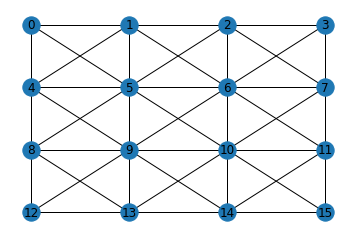

In [4]:
plt.axis('off')
#pos = nx.random_layout(G)
pos = np.array([[-1, 0.5], [-0.5, 0.5], [0, 0.5], [0.5,0.5], 
                [-1, 0], [-0.5, 0], [0, 0], [0.5,0],
                [-1, -0.5],[-0.5, -0.5],[0, -0.5], [0.5,-0.5],
                [-1, -1],[-0.5, -1],[0, -1], [0.5,-1]])
#print(pos)
nx.draw_networkx(G,pos)
plt.show()

In [5]:
from dwave.system import DWaveSampler, EmbeddingComposite, DWaveCliqueSampler
import dimod
import dwave.inspector

bqm = dimod.from_networkx_graph(G, vartype='BINARY', edge_attribute_name='weight', node_attribute_name='weight')

sampleset = EmbeddingComposite(DWaveSampler()).sample(bqm, num_reads=10000, label='checkerboard')

In [6]:
sampleset.variables
sampleset.record

SolverFailureError: Problem not accepted because user andrea.fontana@pv.infn.it has insufficient remaining solver access time in project DEV

In [93]:
res = np.zeros(len(sampleset.record)) 
s = 0

for k, rec in enumerate(sampleset.record):
    states = rec[0]
    print(states)
    for i, sol in enumerate(states):
        p = int(sampleset.variables[i])

r=sampleset.record.num_occurrences
idx=np.argmax(r)
print(idx,r)
solution=sampleset.record
#print(solution)

[1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1]
[1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1]
[1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1]
[1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1]
[1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1]
[1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1]
[1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1]
[1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1]
[1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1]
[1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1]
[1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1]
13 [   7  198   49  134   11 1029    3   73   36   25   66  440   11 5612
   21    5   63  762  480   10  742   22   89    2  110]


<Container object of 25 artists>

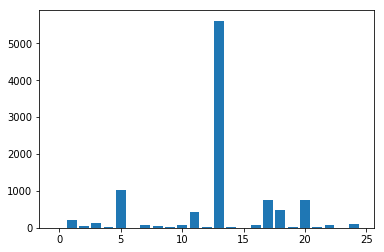

In [94]:
plt.bar(range(len(solution)),r)

In [34]:
dwave.inspector.show(sampleset)

KeyboardInterrupt: 